<a href="https://colab.research.google.com/github/its-relative/Kaggle/blob/main/PySpark_revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
surajjha101_stores_area_and_sales_data_path = kagglehub.dataset_download('surajjha101/stores-area-and-sales-data')

print('Data source import complete.')


100%|██████████| 9.60k/9.60k [00:00<00:00, 14.4MB/s]

Extracting files...
Data source import complete.


<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> Introduction </center> </b>
    <a name="0"></a>
</div><br>

PySpark is the Python API for Apache Spark, an open-source big data processing framework. It provides a powerful and scalable platform for data processing and analytics. This notebook will cover the basics of PySpark and guide you through some fundamental concepts and operations.

![PySPark](https://editor.analyticsvidhya.com/uploads/374441.png)

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> Table of Contents </center> </b>
    <a name="0"></a>
</div><br>

### [1. Installing PySpark](#1)
### [2. Importing Required Libraries](#2)
### [3. Initializing SparkSession](#3)
### [4. Loading Data](#4)
### [5. Exploring Data](#5)
### [6. Data Transformation](#6)
### [7. Data Aggregation](#7)
### [8. Data Visualization](#8)
### [9. Writing Data](#9)
### [10. Conclusion](#10)

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 1. Installing PySpark </center> </b>
    <a name="1"></a>
</div><br>

To use PySpark, you need to have Apache Spark installed on your system. You can download and install Apache Spark from the official website (https://spark.apache.org/downloads.html). Follow the installation instructions provided there.

In [1]:
!pip install spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=c7b9b1917bdddc346f9ae04ab996cf49222a2a872a2027c625555eca7627bbea
  Stored in directory: /root/.cache/pip/wheels/67/c2/7c/a53325365fba358ffff35af84a2e14cf88c18052f88acfa5f0
Successfully built spark


<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 2. Importing Required Libraries </center> </b>
    <a name="2"></a>
</div><br>

Before we start using PySpark, we need to import the necessary libraries.

In [4]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 3. Initializing SparkSession </center> </b>
    <a name="3"></a>
</div><br>

To interact with Spark, we need to create a SparkSession, which serves as the entry point for using PySpark.

In [8]:
spark = SparkSession.builder.appName("PySpark").getOrCreate()

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 4. Loading Data </center> </b>
    <a name="4"></a>
</div><br>

PySpark supports various data formats, including CSV, JSON, Parquet, and more. Let's see how to load a CSV file into a PySpark DataFrame.

In [11]:
data = spark.read.csv(surajjha101_stores_area_and_sales_data_path, header = True, inferSchema=True)

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 5. Exploring Data </center> </b>
    <a name="5"></a>
</div><br>

Once the data is loaded into a PySpark DataFrame, we can perform various operations to explore the data.

In [13]:
# Display the first few rows of the DataFrame
data.show(8)

+---------+----------+---------------+--------------------+-----------+
|Store ID |Store_Area|Items_Available|Daily_Customer_Count|Store_Sales|
+---------+----------+---------------+--------------------+-----------+
|        1|      1659|           1961|                 530|      66490|
|        2|      1461|           1752|                 210|      39820|
|        3|      1340|           1609|                 720|      54010|
|        4|      1451|           1748|                 620|      53730|
|        5|      1770|           2111|                 450|      46620|
|        6|      1442|           1733|                 760|      45260|
|        7|      1542|           1858|                1030|      72240|
|        8|      1261|           1507|                1020|      37720|
+---------+----------+---------------+--------------------+-----------+
only showing top 8 rows



In [14]:
# Display the schema of the DataFrame
data.printSchema()

root
 |-- Store ID : integer (nullable = true)
 |-- Store_Area: integer (nullable = true)
 |-- Items_Available: integer (nullable = true)
 |-- Daily_Customer_Count: integer (nullable = true)
 |-- Store_Sales: integer (nullable = true)



In [16]:
# Get the number of rows in the DataFrame
data.count()

896

In [19]:
# Get summary statistics of numerical columns
data.describe().show()

+-------+----------------+------------------+------------------+--------------------+------------------+
|summary|       Store ID |        Store_Area|   Items_Available|Daily_Customer_Count|       Store_Sales|
+-------+----------------+------------------+------------------+--------------------+------------------+
|  count|             896|               896|               896|                 896|               896|
|   mean|           448.5|1485.4095982142858|1782.0357142857142|   786.3504464285714| 59351.30580357143|
| stddev|258.797217913949|250.23701095319237| 299.8720525241988|  265.38928076727075|17190.741894878298|
|    min|               1|               775|               932|                  10|             14920|
|    max|             896|              2229|              2667|                1560|            116320|
+-------+----------------+------------------+------------------+--------------------+------------------+



<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 6. Data Transformation </center> </b>
    <a name="6"></a>
</div><br>

PySpark provides a wide range of transformation operations to manipulate and preprocess data. Here are a few examples:

In [20]:
# Select specific columns "Store ID ", "Store_Sales"
selected_cols = data.select("Store ID ", "Store_Sales")

In [21]:
# Show selected columns
selected_cols.show()

+---------+-----------+
|Store ID |Store_Sales|
+---------+-----------+
|        1|      66490|
|        2|      39820|
|        3|      54010|
|        4|      53730|
|        5|      46620|
|        6|      45260|
|        7|      72240|
|        8|      37720|
|        9|      46310|
|       10|      44150|
|       11|      71280|
|       12|      57620|
|       13|      60470|
|       14|      59130|
|       15|      66360|
|       16|      78870|
|       17|      77250|
|       18|      38170|
|       19|      63540|
|       20|      40190|
+---------+-----------+
only showing top 20 rows



In [22]:
# Filter rows based on a condition "Daily_Customer_Count"] < 100
filtered_cols = data.filter(data["Daily_Customer_Count"] < 100)


In [23]:
# Show filtered rows
filtered_cols.show()

+---------+----------+---------------+--------------------+-----------+
|Store ID |Store_Area|Items_Available|Daily_Customer_Count|Store_Sales|
+---------+----------+---------------+--------------------+-----------+
|       40|      1270|           1516|                  10|      45480|
|      152|      1662|           1986|                  70|      63730|
+---------+----------+---------------+--------------------+-----------+



In [24]:
# Add a new column "Avg_Sales_per_person", data["Store_Sales"] / data["Daily_Customer_Count"]
new_col = data.withColumn("Avg_Sales_per_person", data["Store_Sales"]/data["Daily_Customer_Count"])

In [26]:
new_col.show(8)

+---------+----------+---------------+--------------------+-----------+--------------------+
|Store ID |Store_Area|Items_Available|Daily_Customer_Count|Store_Sales|Avg_Sales_per_person|
+---------+----------+---------------+--------------------+-----------+--------------------+
|        1|      1659|           1961|                 530|      66490|  125.45283018867924|
|        2|      1461|           1752|                 210|      39820|  189.61904761904762|
|        3|      1340|           1609|                 720|      54010|   75.01388888888889|
|        4|      1451|           1748|                 620|      53730|   86.66129032258064|
|        5|      1770|           2111|                 450|      46620|               103.6|
|        6|      1442|           1733|                 760|      45260|   59.55263157894737|
|        7|      1542|           1858|                1030|      72240|   70.13592233009709|
|        8|      1261|           1507|                1020|      37720

In [29]:
# Group by a column StoreID and compute aggregate functions Store_Sales": "sum"
grouped = data.groupBy("Store ID ").agg({"Store_Sales": "sum"})

In [30]:
grouped.show(5)

+---------+----------------+
|Store ID |sum(Store_Sales)|
+---------+----------------+
|      148|           50360|
|      463|           43190|
|      471|           71240|
|      496|           49750|
|      833|           38510|
+---------+----------------+
only showing top 5 rows



<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 7. Data Aggregation </center> </b>
    <a name="7"></a>
</div><br>


PySpark provides powerful functions for aggregating data. Here's an example of how to compute the average of a column:

In [33]:
# Compute the average of a column Store_Sales
expr = data.selectExpr("avg(Store_Sales)").collect()

In [35]:
aggregated_data = expr[0][0]

59351.30580357143

59351.30580357143

8. Data Visualization

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 8. Data Visualization </center> </b>
    <a name="8"></a>
</div><br>

PySpark integrates well with popular Python visualization libraries, such as Matplotlib and Seaborn. Here's an example of how to create a histogram using Matplotlib:

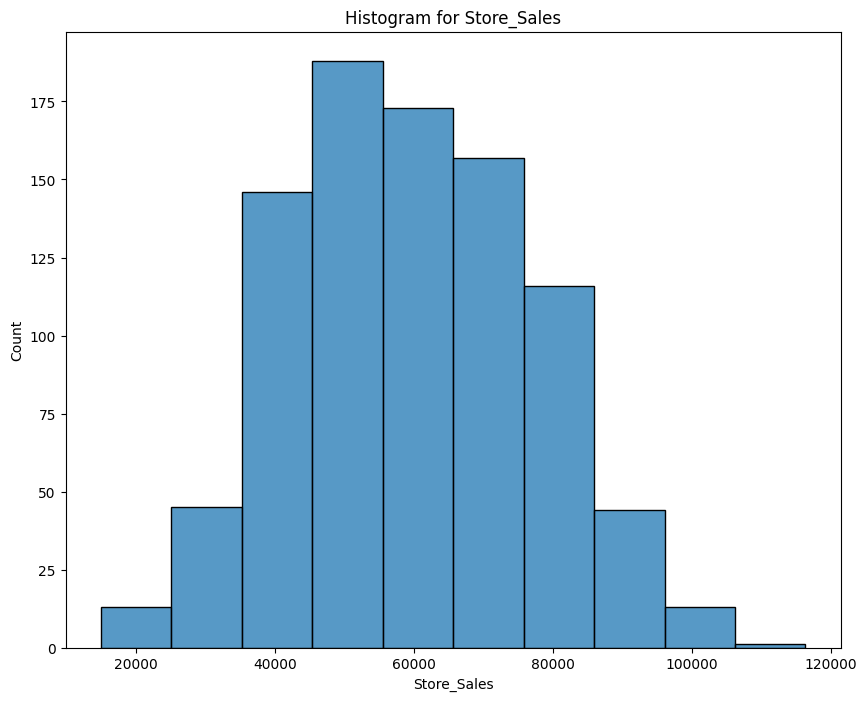

In [41]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Convert PySpark DataFrame data to Pandas DataFrame
df = data.toPandas()

# Create a histogram for Store_Sales
plt.figure(figsize=(10,8))
sns.histplot(data = df, x = "Store_Sales", bins=10)
plt.title("Histogram for Store_Sales")
plt.show()

<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
`        <b> <center> 9. Writing Data </center> </b>
    <a name="9"></a>
</div><br>

PySpark allows us to write data back to different formats. Here's an example of how to write a PySpark DataFrame to a Parquet file:

In [ ]:
# Write DataFrame to Parquet file


<br><div  class="alert alert-success" style="background-color: #045D5D; border-color: #694b98; font-size: 15pt;font-family: Serif; color: white">
        <b> <center> 10. Conclusion </center> </b>
    <a name="10"></a>
</div><br>

This notebook provided a brief introduction to PySpark and covered some of the basics, including loading data, exploring data, data transformation, data aggregation, data visualization, and writing data.

PySpark offers many more advanced features and capabilities, which you can explore further to leverage the full power of Apache Spark for big data processing and analytics.